In [26]:
import csv
import random
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os


from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
#import seaborn as sns
import matplotlib.pyplot as plt

# scoring
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [2]:
root_dir='RawData/AllBooks_baseline_DTM_Labelled.csv'

fullset = pd.read_csv(root_dir)

In [3]:
#split test train
train, test= train_test_split(fullset, test_size=0.30, random_state=42)

In [4]:
train[:]

,Unnamed: 0,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
369,YogaSutra_Ch81,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,YogaSutra_Ch10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
383,YogaSutra_Ch95,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245,Upanishad_Ch119,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
457,YogaSutra_Ch169,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,TaoTeChing_Ch26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,TaoTeChing_Ch61,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,Upanishad_Ch144,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,YogaSutra_Ch147,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Check for mising values
print("*****In the train set*****")
print(train.isna().sum())
print("\n")
print("*****In the test set*****")
print(test.isna().sum())

*****In the train set*****
Unnamed: 0     0
foolishness    0
hath           0
wholesome      0
takest         0
              ..
visual         0
thoughts       0
illumines      0
attire         0
explains       0
Length: 8267, dtype: int64


*****In the test set*****
Unnamed: 0     0
foolishness    0
hath           0
wholesome      0
takest         0
              ..
visual         0
thoughts       0
illumines      0
attire         0
explains       0
Length: 8267, dtype: int64


In [37]:
#build kmeans model
rangeOfKMeans = range(2, 12)
kmModel = [KMeans(n_clusters=i) for i in rangeOfKMeans]
#trainedKM = [kmModel[i].fit(train.iloc[: , 1:]) ]


In [38]:
train.iloc[: , :]

,Unnamed: 0,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
369,YogaSutra_Ch81,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,YogaSutra_Ch10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
383,YogaSutra_Ch95,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245,Upanishad_Ch119,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
457,YogaSutra_Ch169,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,TaoTeChing_Ch26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,TaoTeChing_Ch61,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,Upanishad_Ch144,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,YogaSutra_Ch147,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
trained = []
preds = []
for i in range(len(kmModel)):
    trained.append(kmModel[i].fit(train.iloc[: , 1:]))
    preds.append(trained[i].predict(test.iloc[: , 1:]))

In [75]:
corrrectLabels = []

for i in range(len(test.iloc[: , 0])):
    tmp = test.iloc[i , 0]
    tmp=tmp[0:int(tmp.find('_'))]
    corrrectLabels.append(tmp)
print("Number of unique books = " + str(len(set(corrrectLabels))))

Number of unique books = 8


In [76]:
set(corrrectLabels)

{'BookOfEccleasiasticus',
 'BookOfEcclesiastes',
 'BookOfProverb',
 'BookOfWisdom',
 'Buddhism',
 'TaoTeChing',
 'Upanishad',
 'YogaSutra'}

In [68]:
shs, db = {}, {}

for i in range(2,12):
    shs[i]=silhouette_score(test.iloc[:,1:], preds[i-2])
    db[i]=davies_bouldin_score(test.iloc[:,1:], preds[i-2])

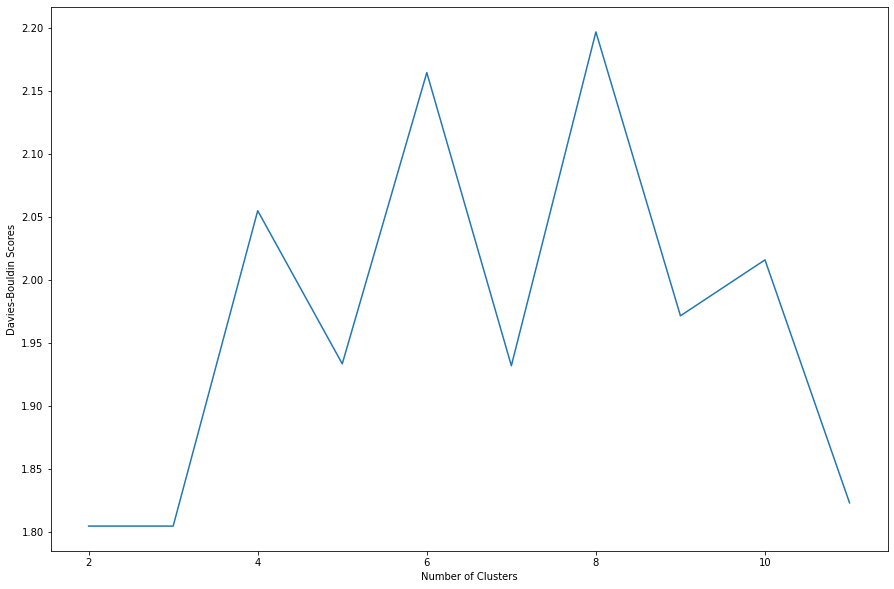

In [73]:
plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Scores")
plt.show()

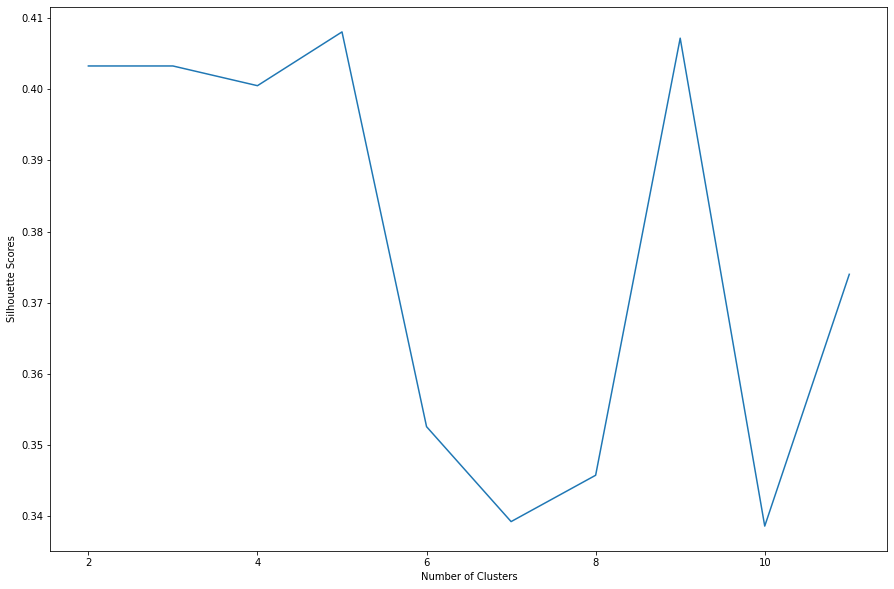

In [74]:
plt.figure(figsize=(15,10))
plt.plot(list(shs.keys()), list(shs.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Scores")
plt.show()